In [2]:
from projet_etu import *
import matplotlib.pyplot as plt
import numpy as np
from utils.mltools import *
from sklearn.model_selection import train_test_split

/Users/tian/Documents/androide/ml/proj nouveau/projet_final/projet_etu.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
batchsize = 1000

X_train, y_train = gen_arti(centerx=1, centery=1, sigma=0.1, nbex=3000, data_type=1, epsilon=0.1)
X_test, y_test = gen_arti(centerx=1, centery=1, sigma=0.1, nbex=batchsize, data_type=1, epsilon=0.1)


y_train = np.where(y_train == -1, 0, 1).reshape((-1, 1))
y_test = np.where(y_test == -1, 0, 1).reshape((-1, 1))


n = X_train.shape[1]
hidden = 60
d = 1
iteration = 100
gradient_step = 1e-4

In [3]:
loss_mse = MSELoss()
lin_layer = Linear(n, hidden)
lin_layer2 = Linear(hidden, d)
act_sig = Sigmoid()
act_tan = TanH()

In [4]:
train_accuracies = []
test_accuracies = []

for _ in range(iteration):

    # forward
    hidden_lin = lin_layer.forward(X_train)
    hidden_tan = act_tan.forward(hidden_lin)
    hidden_lin2 = lin_layer2.forward(hidden_tan)
    hidden_sig = act_sig.forward(hidden_lin2)
    loss = loss_mse.forward(y_train, hidden_sig)

    # backward

    loss_back = loss_mse.backward(y_train, hidden_sig)
    delta_sig = act_sig.backward_delta(hidden_lin2, loss_back)
    delta_lin2 = lin_layer2.backward_delta(hidden_tan, delta_sig)
    delta_tan = act_tan.backward_delta(hidden_lin, delta_lin2)
    delta_lin = lin_layer.backward_delta(X_train, delta_tan)

    lin_layer2.backward_update_gradient(hidden_tan, delta_sig)
    lin_layer.backward_update_gradient(X_train, delta_tan)

    lin_layer2.update_parameters(gradient_step=gradient_step)
    lin_layer.update_parameters(gradient_step=gradient_step)

    lin_layer2.zero_grad()
    lin_layer.zero_grad()

Final test accuracy:  0.996


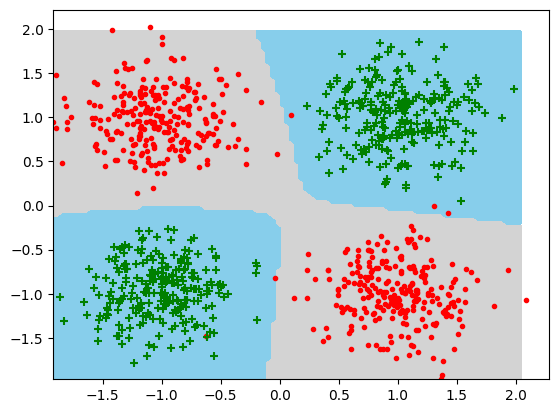

In [5]:
def predict(x):
    hidden_l = lin_layer.forward(x)
    hidden_l = act_tan.forward(hidden_l)
    hidden_l = lin_layer2.forward(hidden_l)
    hidden_l = act_sig.forward(hidden_l)
    return np.where(hidden_l >= 0.5, 1, 0)


print("Final test accuracy: ", np.mean(y_test == predict(X_test)))

plot_frontiere(X_test, predict, step=100)
plot_data(X_test, y_test.reshape(-1))

### Experimentations: (sur les nb de neurones)

#### Sans bruits:

In [ ]:
size = 2500

# Generate synthetic data
datax, datay = gen_arti(centerx=1, centery=1, sigma=0.1, nbex=size, data_type=1, epsilon=0)
testx, testy = gen_arti(centerx=1, centery=1, sigma=0.1, nbex=size, data_type=1, epsilon=0)

# Convert labels from -1/1 to 0/1
datay = np.where(datay == -1, 0, 1).reshape((-1, 1))
testy = np.where(testy == -1, 0, 1).reshape((-1, 1))

# Number of epochs and batch size for training
epochs = 1000
sizeba = 100

# List of neuron configurations to test
neuron_configs = [2,3, 10]

# Store results
results = []

# Loop over different neuron configurations
for nh in neuron_configs:
    # nh2 = nh  # Keep the same number of neurons in the second hidden layer for simplicity
    
    # Initialize the network
    couche_lin = Linear(datax.shape[1], nh, type="normal")
    couche_lin2 = Linear(nh, 1, type="he_normal")
    # couche_lin3 = Linear(nh2, 1, type="normal")

    sig = Sigmoid()
    tan = TanH()

    net = Sequential([couche_lin, tan, couche_lin2, sig])

    loss_mse = MSELoss()
    opt = Optim(net, loss_mse, eps=1e-4)
    
    # Train the network
    opt.SGD(datax, datay, sizeba, epochs=epochs, test_train_split=False, verbose=False)
    
    # Record best accuracy and loss
    best_train_accuracy = max(opt.train_score)

    # Calculate accuracy for test data
    test_pred = net.predict(testx)
    test_accuracy = (test_pred == testy).mean()
    
    results.append({
        'nh': nh,
        'best_train_accuracy': best_train_accuracy,
        'train_loss': opt.train_loss,
        'train_score': opt.train_score,
        'test_accuracy': test_accuracy,
    })
    
    # Plot decision boundary for current configuration
    plot_frontiere(testx, opt.net.predict, step=100)
    plot_data(testx, testy.reshape(-1))
    plt.title(f'Decision Boundary with {nh} Neurons')
    plt.show()

# Plot all training losses in one plot
plt.figure(figsize=(10, 6))
for result in results:
    plt.plot(result['train_loss'], label=f'{result["nh"]} Neurons')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss for Different Neuron Configurations')
plt.legend()
plt.show()

# Plot all training accuracies in one plot
plt.figure(figsize=(10, 6))
for result in results:
    plt.plot(result['train_score'], label=f'{result["nh"]} Neurons')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy for Different Neuron Configurations')
plt.legend()
plt.show()

# Print results for each configuration
for result in results:
    nh = result['nh']
    print(f"Configuration with {nh} Neurons:")
    print(f"Meilleure accuracy sur les données d'entraînement : {result['best_train_accuracy']:.4f}")
    print(f"Accuracy sur les données de test : {result['test_accuracy']:.4f}")


#### Avec bruits (epsilon = 0.5):

  0%|          | 0/1000 [00:00<?, ?it/s]

Training completed.


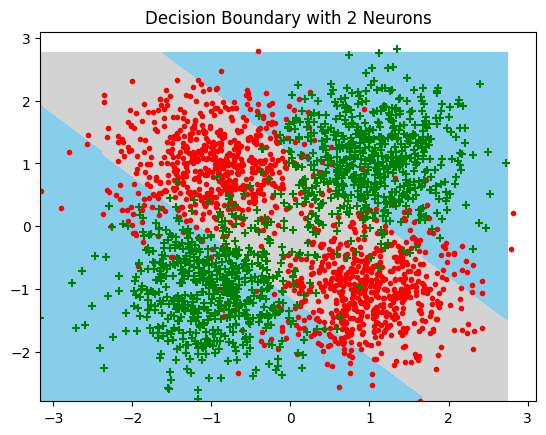

  0%|          | 0/1000 [00:00<?, ?it/s]

Training completed.


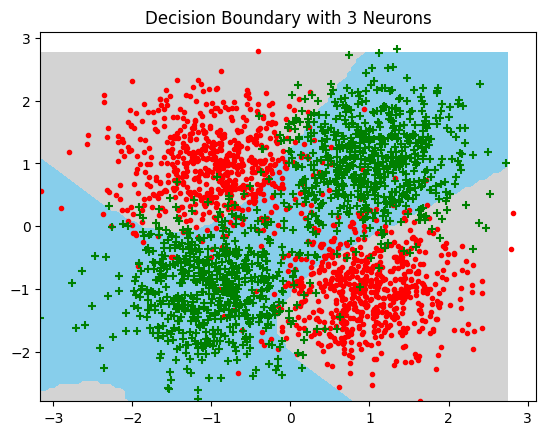

  0%|          | 0/1000 [00:00<?, ?it/s]

Training completed.


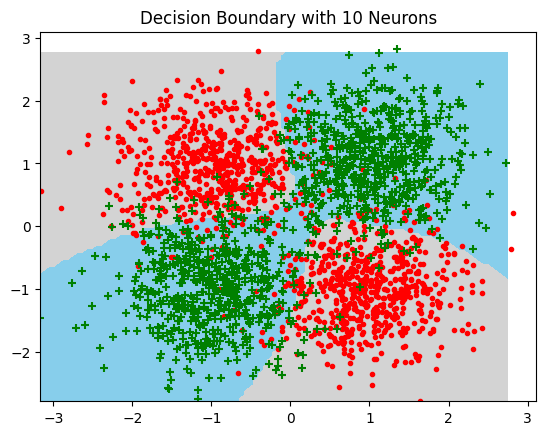

  0%|          | 0/1000 [00:00<?, ?it/s]

Training completed.


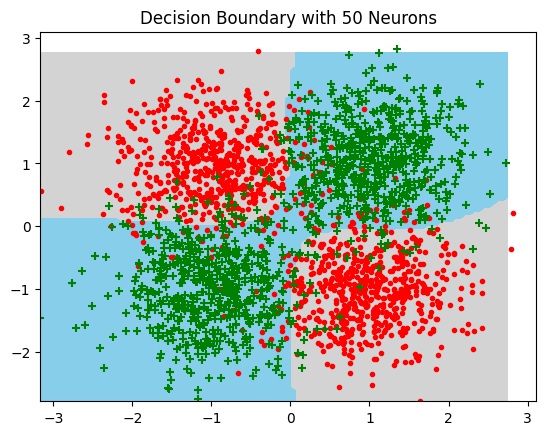

  0%|          | 0/1000 [00:00<?, ?it/s]

Training completed.


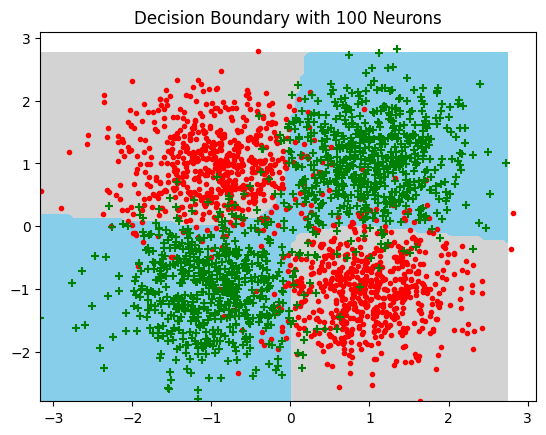

  0%|          | 0/1000 [00:00<?, ?it/s]

Training completed.


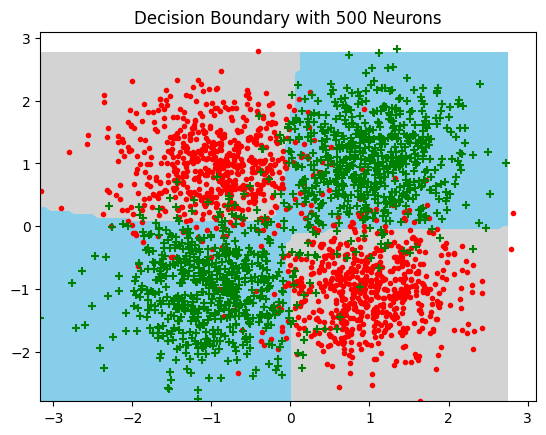

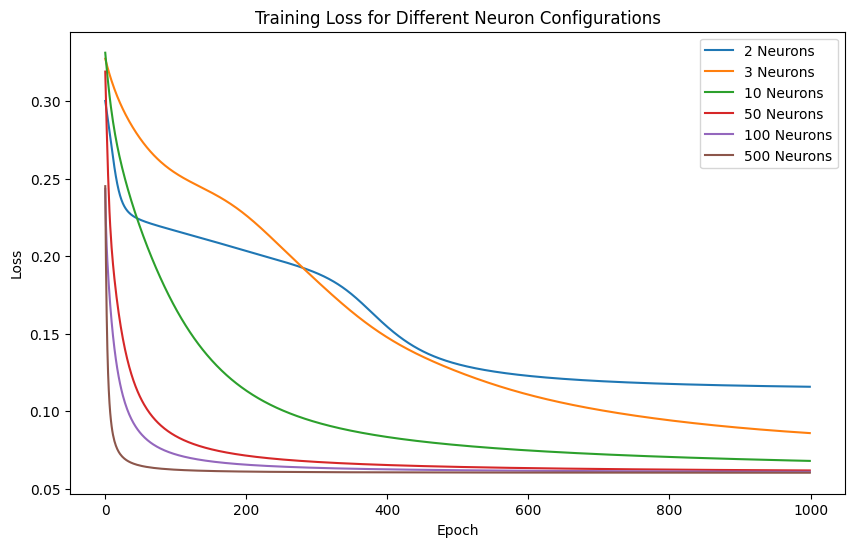

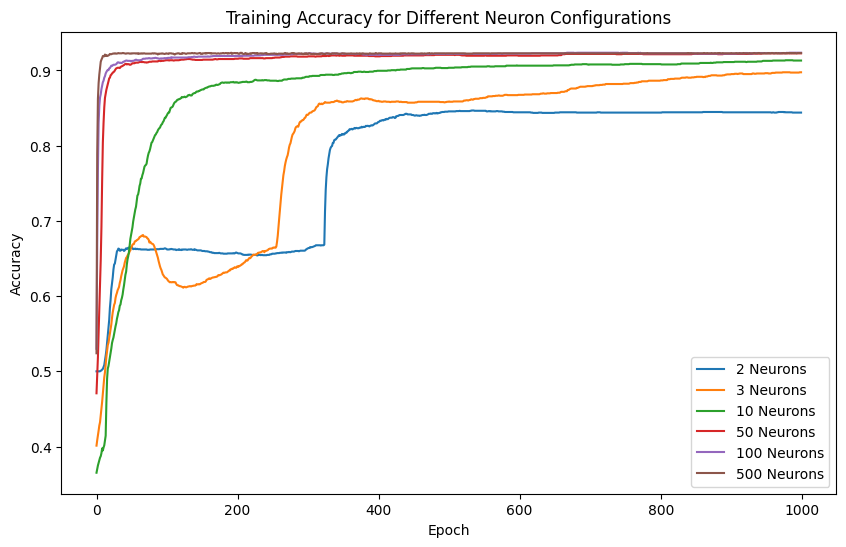

Configuration with 2 Neurons:
Meilleure accuracy sur les données d'entraînement : 0.8468
Accuracy sur les données de test : 0.8356
Configuration with 3 Neurons:
Meilleure accuracy sur les données d'entraînement : 0.8976
Accuracy sur les données de test : 0.8832
Configuration with 10 Neurons:
Meilleure accuracy sur les données d'entraînement : 0.9136
Accuracy sur les données de test : 0.9096
Configuration with 50 Neurons:
Meilleure accuracy sur les données d'entraînement : 0.9228
Accuracy sur les données de test : 0.9132
Configuration with 100 Neurons:
Meilleure accuracy sur les données d'entraînement : 0.9236
Accuracy sur les données de test : 0.9132
Configuration with 500 Neurons:
Meilleure accuracy sur les données d'entraînement : 0.9236
Accuracy sur les données de test : 0.9136


In [19]:
size = 2500

# Generate synthetic data
datax, datay = gen_arti(centerx=1, centery=1, sigma=0.1, nbex=size, data_type=1, epsilon=0.5)
testx, testy = gen_arti(centerx=1, centery=1, sigma=0.1, nbex=size, data_type=1, epsilon=0.5)

# Convert labels from -1/1 to 0/1
datay = np.where(datay == -1, 0, 1).reshape((-1, 1))
testy = np.where(testy == -1, 0, 1).reshape((-1, 1))

# Number of epochs and batch size for training
epochs = 1000
sizeba = 100

# List of neuron configurations to test
neuron_configs = [2,3, 10, 50,100,500]

# Store results
results = []

# Loop over different neuron configurations
for nh in neuron_configs:
    # nh2 = nh  # Keep the same number of neurons in the second hidden layer for simplicity
    
    # Initialize the network
    couche_lin = Linear(datax.shape[1], nh, type="normal")
    couche_lin2 = Linear(nh, 1, type="he_normal")
    # couche_lin3 = Linear(nh2, 1, type="normal")

    sig = Sigmoid()
    tan = TanH()

    net = Sequential([couche_lin, tan, couche_lin2, sig])

    loss_mse = MSELoss()
    opt = Optim(net, loss_mse, eps=1e-4)
    
    # Train the network
    opt.SGD(datax, datay, sizeba, epochs=epochs, test_train_split=False, verbose=False)
    
    # Record best accuracy and loss
    best_train_accuracy = max(opt.train_score)

    # Calculate accuracy for test data
    test_pred = net.predict(testx)
    test_accuracy = (test_pred == testy).mean()
    
    results.append({
        'nh': nh,
        'best_train_accuracy': best_train_accuracy,
        'train_loss': opt.train_loss,
        'train_score': opt.train_score,
        'test_accuracy': test_accuracy,
    })
    
    # Plot decision boundary for current configuration
    plot_frontiere(testx, opt.net.predict, step=100)
    plot_data(testx, testy.reshape(-1))
    plt.title(f'Decision Boundary with {nh} Neurons')
    plt.show()

# Plot all training losses in one plot
plt.figure(figsize=(10, 6))
for result in results:
    plt.plot(result['train_loss'], label=f'{result["nh"]} Neurons')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss for Different Neuron Configurations')
plt.legend()
plt.show()

# Plot all training accuracies in one plot
plt.figure(figsize=(10, 6))
for result in results:
    plt.plot(result['train_score'], label=f'{result["nh"]} Neurons')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy for Different Neuron Configurations')
plt.legend()
plt.show()

# Print results for each configuration
for result in results:
    nh = result['nh']
    print(f"Configuration with {nh} Neurons:")
    print(f"Meilleure accuracy sur les données d'entraînement : {result['best_train_accuracy']:.4f}")
    print(f"Accuracy sur les données de test : {result['test_accuracy']:.4f}")
